In [0]:
! wget https://www.dropbox.com/s/s16mzmyoxrlgiw5/data.zip?dl=0

--2020-01-05 18:01:46--  https://www.dropbox.com/s/s16mzmyoxrlgiw5/data.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/s16mzmyoxrlgiw5/data.zip [following]
--2020-01-05 18:01:46--  https://www.dropbox.com/s/raw/s16mzmyoxrlgiw5/data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8e16250c753e175c4dad0e8d05.dl.dropboxusercontent.com/cd/0/inline/Avkk7u0HkgqLes3e1g39Vx7qDNOVIMUZIC6CvBE076AOZfAnIA-Ug2kpbh1UNaANsMD7iuVjABSH_x09Z3Om7bAz9QHU_rnezq_A4qolR4hW9tGitcwjvs2fg4S6wH6-vbI/file# [following]
--2020-01-05 18:01:47--  https://uc8e16250c753e175c4dad0e8d05.dl.dropboxusercontent.com/cd/0/inline/Avkk7u0HkgqLes3e1g39Vx7qDNOVIMUZIC6CvBE076AOZfAnIA-Ug2kpbh1UNaANsMD7iuVjABSH_x09Z3Om7bAz9QHU_rnezq_A4qolR4hW9tGitcwjvs

In [0]:
! unzip data.zip?dl=0 -d "Train/"

Archive:  data.zip?dl=0
  inflating: Train/data/1.png        
  inflating: Train/data/10.png       
  inflating: Train/data/100.png      
  inflating: Train/data/1000.png     
  inflating: Train/data/1001.png     
  inflating: Train/data/1002.png     
  inflating: Train/data/1003.png     
  inflating: Train/data/1004.png     
  inflating: Train/data/1005.png     
  inflating: Train/data/1006.png     
  inflating: Train/data/1007.png     
  inflating: Train/data/1008.png     
  inflating: Train/data/1009.png     
  inflating: Train/data/101.png      
  inflating: Train/data/1010.png     
  inflating: Train/data/1011.png     
  inflating: Train/data/1012.png     
  inflating: Train/data/1013.png     
  inflating: Train/data/1014.png     
  inflating: Train/data/1015.png     
  inflating: Train/data/1016.png     
  inflating: Train/data/1017.png     
  inflating: Train/data/1018.png     
  inflating: Train/data/1019.png     
  inflating: Train/data/102.png      
  inflating: Train/data/10

In [0]:
from keras.preprocessing import image
import os
import matplotlib.pyplot as plt

In [0]:
def readImage(path):
  img=image.load_img(path,target_size=(32,32))
  image_array=image.img_to_array(img)
  #plt.axis('off')
  #plt.imshow(image_array/255.0)
  #plt.show()
  return image_array

In [0]:
path=os.path.join('Train','data')
print(path)

Train/data


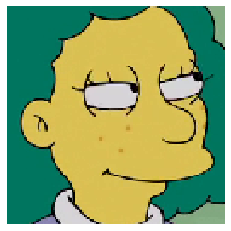

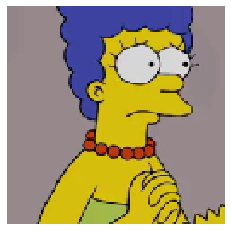

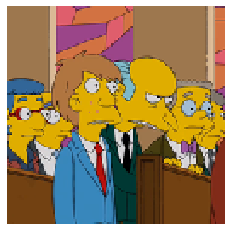

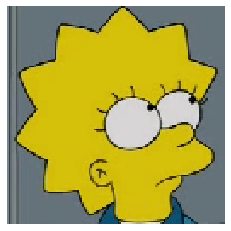

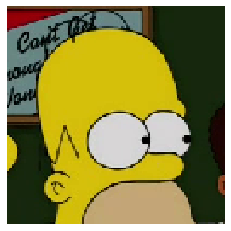

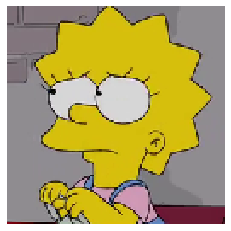

In [0]:
count=0
for i in os.listdir(path):
  #print(i)
  readImage(os.path.join(path,i))
  if count==5:
    break
  count+=1

In [0]:
# lets prepare our data first
train_data=[]
for i in os.listdir(path):
  image_array=readImage(os.path.join(path,i))
  train_data.append(image_array)

In [0]:
import numpy as np
train_data=np.array(train_data)
train_data=((train_data.astype('float32')-127.5)/127.5)
print(train_data.min())
print(train_data.max())

-1.0
1.0


In [0]:
import numpy as np
train_data=np.array(train_data)
print(train_data.shape)

(9877, 32, 32, 3)


In [0]:
# normalisation of data
for i in range(train_data.shape[0]):
  for chan in range(3):
    val=train_data[i][:,:,chan]
    train_data[i][:,:,chan]=(val-np.min(val))/(np.max(val)-np.min(val))

In [0]:
print(np.max(train_data))
print(np.min(train_data))

1.0
-1.0


In [0]:
from keras.models import Sequential,Model
from keras.optimizers import Adam,RMSprop,SGD
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
import math

In [0]:
# lets define some parameters:
NUM_EPOCHS=500
BATCH_SIZE=64
HALF_BATCH_SIZE=int(BATCH_SIZE/2)
NO_OF_BATCHES=math.ceil(train_data.shape[0]/BATCH_SIZE)
adam=Adam(lr=2e-4,beta_1=0.5)
#adam=Adam(lr=0.00004,beta_1=0.5)
NOISE_DIM=100

In [0]:
# lets construct our generator:
generator=Sequential()

generator.add(Dense(8*8*128,input_shape=(NOISE_DIM,)))
generator.add(Reshape((8,8,128)))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())


generator.add(Conv2DTranspose(64, kernel_size=(5,5), padding='same', strides=(2,2)))
#generator.add(Conv2D(64,kernel_size=(5,5),padding='same')) # 16,16,64
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

generator.add(Conv2DTranspose(3, kernel_size=(5,5), padding='same', strides=(2,2),activation='tanh'))
#generator.add(Conv2D(3,kernel_size=(5,5),padding='same',activation='tanh')) 


generator.compile(loss='binary_crossentropy',optimizer=adam)
generator.summary()



Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 8192)              827392    
_________________________________________________________________
reshape_13 (Reshape)         (None, 8, 8, 128)         0         
_________________________________________________________________
leaky_re_lu_77 (LeakyReLU)   (None, 8, 8, 128)         0         
_________________________________________________________________
batch_normalization_77 (Batc (None, 8, 8, 128)         512       
_________________________________________________________________
conv2d_transpose_35 (Conv2DT (None, 16, 16, 64)        204864    
_________________________________________________________________
leaky_re_lu_78 (LeakyReLU)   (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_78 (Batc (None, 16, 16, 64)      

In [0]:
# lets construct our discriminator
discriminator=Sequential()
discriminator.add(Conv2D(64,strides=(2,2),padding='same',input_shape=(32,32,3),kernel_size=(5,5)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(BatchNormalization())

discriminator.add(Conv2D(128,strides=(2,2),padding='same',kernel_size=(5,5)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(BatchNormalization())

discriminator.add(Conv2D(256,strides=(2,2),padding='same',kernel_size=(5,5)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(BatchNormalization())

discriminator.add(Conv2D(512,strides=(2,2),padding='same',kernel_size=(5,5)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(BatchNormalization())

discriminator.add(Flatten())
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer=adam)
discriminator.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 16, 16, 64)        4864      
_________________________________________________________________
leaky_re_lu_79 (LeakyReLU)   (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_79 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 8, 8, 128)         204928    
_________________________________________________________________
leaky_re_lu_80 (LeakyReLU)   (None, 8, 8, 128)         0         
_________________________________________________________________
batch_normalization_80 (Batc (None, 8, 8, 128)         512       
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 4, 4, 256)       

In [0]:
# GAN
discriminator.trainable=False
gan_input=Input(shape=(NOISE_DIM,))
generated_images=generator(gan_input)
gan_output=discriminator(generated_images)

model=Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)

In [0]:
import os
#os.mkdir('images')

def save_images(epoch,samples=100):
  noise=np.random.normal(0,1,size=(samples,100))
  generated_images=generator.predict(noise)
  generated_images=generated_images.reshape((samples,32,32,3))

  plt.figure(figsize=(10,10))
  for i in range(samples):
    plt.subplot(10,10,i+1)
    plt.axis('off')
    #plt.imshow(generated_images[i].astype('uint8'),interpolation='nearest')
    plt.imshow(generated_images[i],interpolation='nearest')
  plt.tight_layout()
  plt.savefig('images/gan_output_epoch_{0}.png'.format(epoch+1))
  plt.show()

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1   Discriminator_loss 0.5468   Generator_loss 6.7899  
Epoch 2   Discriminator_loss 0.4370   Generator_loss 3.9798  
Epoch 3   Discriminator_loss 0.3860   Generator_loss 3.7848  
Epoch 4   Discriminator_loss 0.3374   Generator_loss 3.7929  
Epoch 5   Discriminator_loss 0.3070   Generator_loss 3.9241  
Epoch 6   Discriminator_loss 0.2676   Generator_loss 3.8511  
Epoch 7   Discriminator_loss 0.2722   Generator_loss 4.0477  
Epoch 8   Discriminator_loss 0.2314   Generator_loss 4.2125  
Epoch 9   Discriminator_loss 0.2568   Generator_loss 4.1760  


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Epoch 10   Discriminator_loss 0.2419   Generator_loss 4.3130  


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

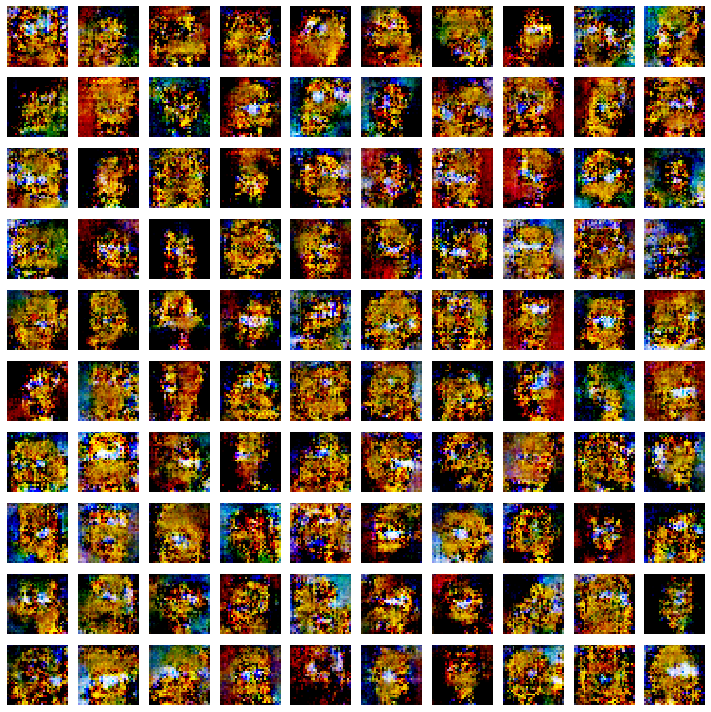

Epoch 11   Discriminator_loss 0.2292   Generator_loss 4.3743  
Epoch 12   Discriminator_loss 0.2265   Generator_loss 4.4793  
Epoch 13   Discriminator_loss 0.2116   Generator_loss 4.5854  
Epoch 14   Discriminator_loss 0.2441   Generator_loss 4.6335  
Epoch 15   Discriminator_loss 0.2248   Generator_loss 4.4094  
Epoch 16   Discriminator_loss 0.2223   Generator_loss 4.5629  
Epoch 17   Discriminator_loss 0.2270   Generator_loss 4.6396  
Epoch 18   Discriminator_loss 0.2003   Generator_loss 4.7544  
Epoch 19   Discriminator_loss 0.2046   Generator_loss 4.9017  


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 20   Discriminator_loss 0.2305   Generator_loss 4.8811  


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

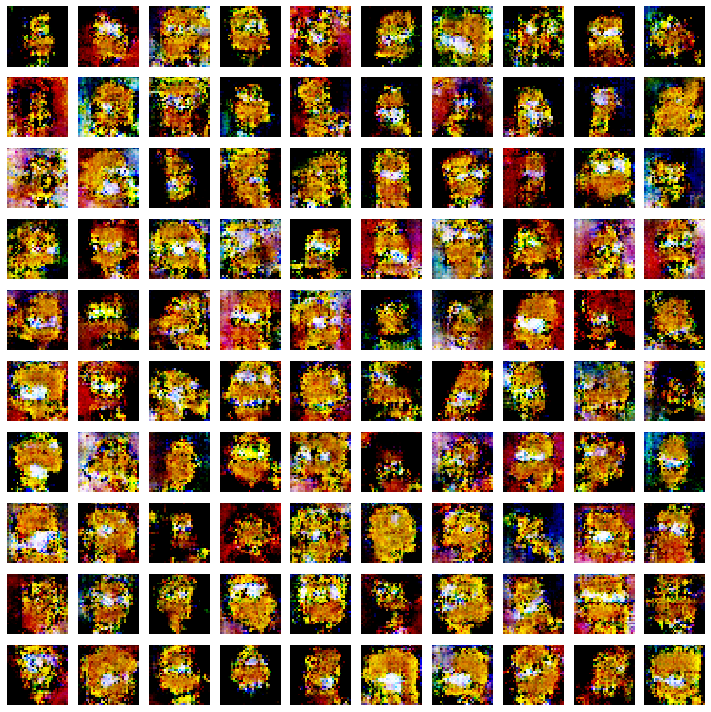

Epoch 21   Discriminator_loss 0.2049   Generator_loss 4.7523  
Epoch 22   Discriminator_loss 0.1914   Generator_loss 5.0191  
Epoch 23   Discriminator_loss 0.2272   Generator_loss 5.0062  
Epoch 24   Discriminator_loss 0.2173   Generator_loss 4.8039  
Epoch 25   Discriminator_loss 0.2318   Generator_loss 4.8828  
Epoch 26   Discriminator_loss 0.2146   Generator_loss 4.4072  
Epoch 27   Discriminator_loss 0.1850   Generator_loss 5.2007  
Epoch 28   Discriminator_loss 0.1934   Generator_loss 5.3813  
Epoch 29   Discriminator_loss 0.1836   Generator_loss 5.4557  


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Epoch 30   Discriminator_loss 0.1969   Generator_loss 5.4703  


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

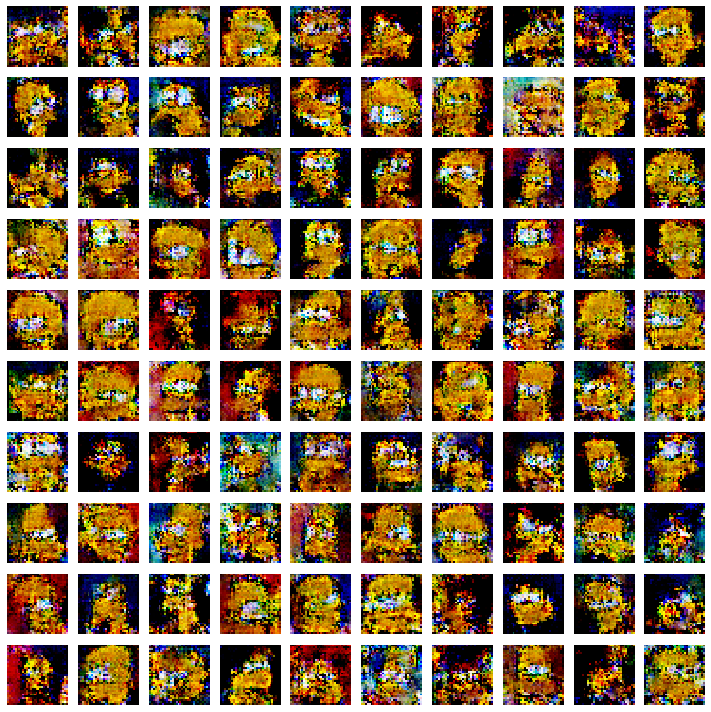

Epoch 31   Discriminator_loss 0.2112   Generator_loss 5.3727  
Epoch 32   Discriminator_loss 0.1991   Generator_loss 5.2330  
Epoch 33   Discriminator_loss 0.1967   Generator_loss 5.3591  
Epoch 34   Discriminator_loss 0.2202   Generator_loss 5.0238  
Epoch 35   Discriminator_loss 0.2081   Generator_loss 5.0100  
Epoch 36   Discriminator_loss 0.2110   Generator_loss 5.0103  
Epoch 37   Discriminator_loss 0.1903   Generator_loss 5.2416  
Epoch 38   Discriminator_loss 0.1903   Generator_loss 5.4989  
Epoch 39   Discriminator_loss 0.1814   Generator_loss 5.6868  


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Epoch 40   Discriminator_loss 0.1766   Generator_loss 5.9510  


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

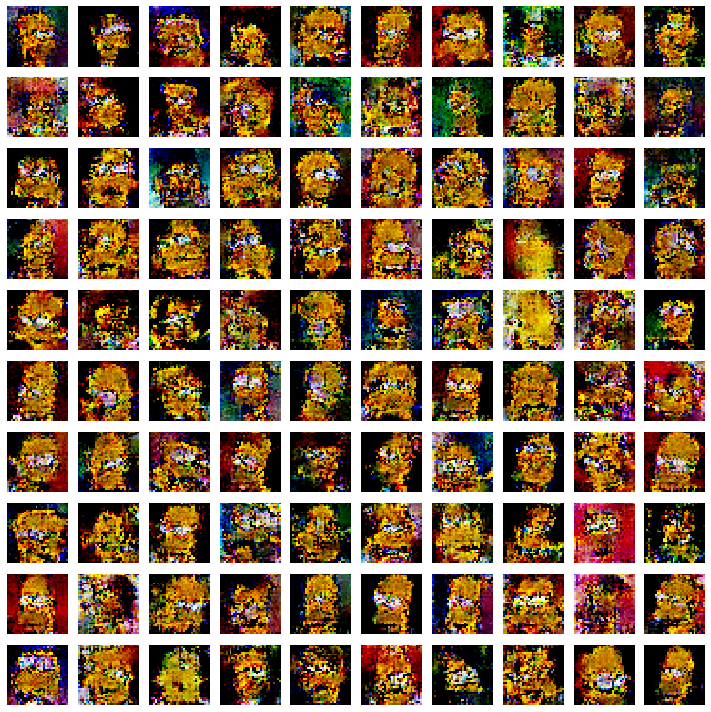

Epoch 41   Discriminator_loss 0.2072   Generator_loss 5.4657  
Epoch 42   Discriminator_loss 0.1947   Generator_loss 5.3356  
Epoch 43   Discriminator_loss 0.2158   Generator_loss 5.2005  
Epoch 44   Discriminator_loss 0.1852   Generator_loss 5.4192  
Epoch 45   Discriminator_loss 0.1793   Generator_loss 5.7450  
Epoch 46   Discriminator_loss 0.1982   Generator_loss 5.4737  
Epoch 47   Discriminator_loss 0.2042   Generator_loss 5.1998  
Epoch 48   Discriminator_loss 0.1856   Generator_loss 5.5749  
Epoch 49   Discriminator_loss 0.1746   Generator_loss 5.8702  


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Epoch 50   Discriminator_loss 0.1870   Generator_loss 5.8980  


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

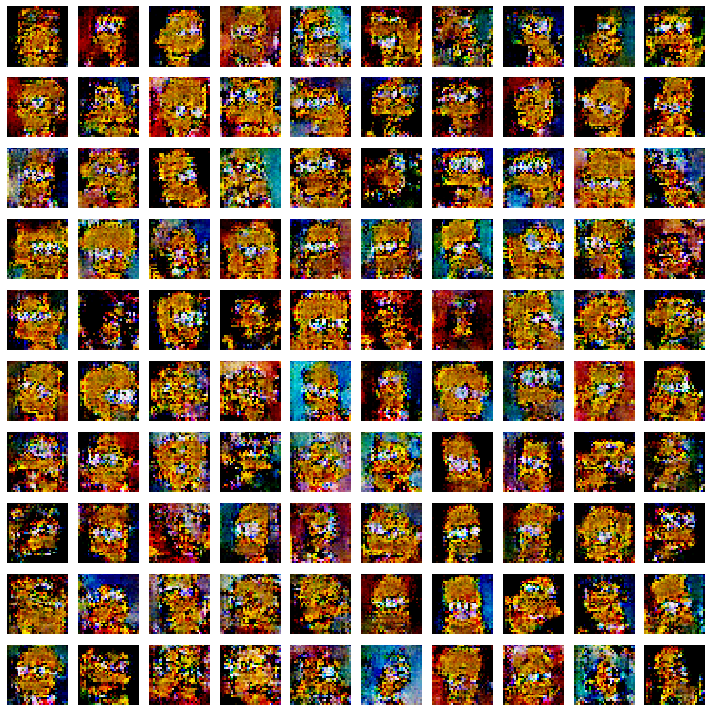

Epoch 51   Discriminator_loss 0.2035   Generator_loss 5.8469  
Epoch 52   Discriminator_loss 0.1988   Generator_loss 5.1151  
Epoch 53   Discriminator_loss 0.1791   Generator_loss 5.6722  
Epoch 54   Discriminator_loss 0.1935   Generator_loss 5.5679  
Epoch 55   Discriminator_loss 0.1869   Generator_loss 5.5477  
Epoch 56   Discriminator_loss 0.1741   Generator_loss 5.9848  
Epoch 57   Discriminator_loss 0.1928   Generator_loss 6.1905  
Epoch 58   Discriminator_loss 0.2010   Generator_loss 5.2646  
Epoch 59   Discriminator_loss 0.1802   Generator_loss 6.0303  


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Epoch 60   Discriminator_loss 0.1956   Generator_loss 5.7442  


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

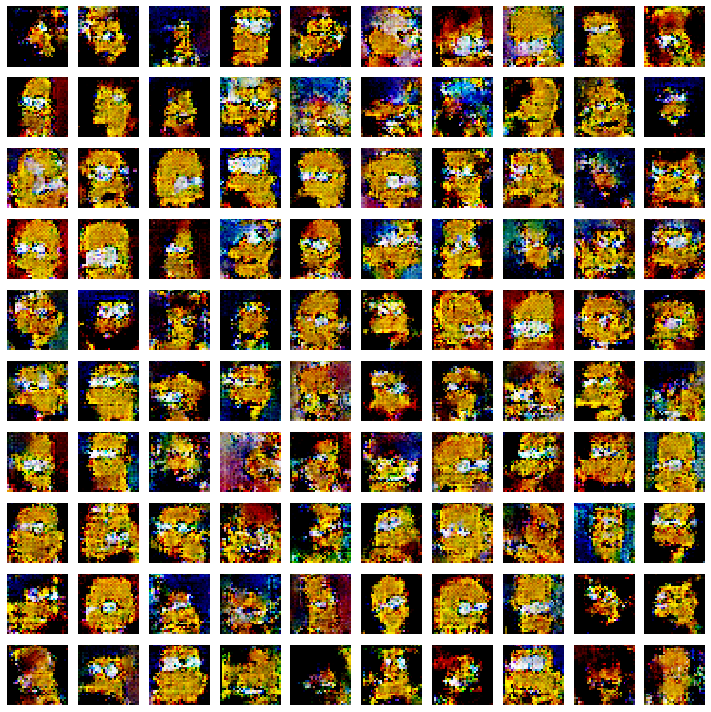

Epoch 61   Discriminator_loss 0.1814   Generator_loss 5.8600  
Epoch 62   Discriminator_loss 0.1945   Generator_loss 6.0994  
Epoch 63   Discriminator_loss 0.2095   Generator_loss 5.2169  


KeyboardInterrupt: ignored

In [0]:
# Training
d_losses=[]
g_losses=[]
for epoch in range(NUM_EPOCHS):
  epoch_d_loss=0
  epoch_g_loss=0
  for step in range(NO_OF_BATCHES):
    idx=np.random.randint(0,train_data.shape[0],HALF_BATCH_SIZE)
    # real_imgs
    real_imgs=train_data[idx]
    # fake_imgs
    noise=np.random.normal(0,1,size=(HALF_BATCH_SIZE,NOISE_DIM))
    fake_imgs=generator.predict(noise)

    # real_y
    real_y=np.ones((HALF_BATCH_SIZE,1))*0.9
    # fake_y
    fake_y=np.zeros((HALF_BATCH_SIZE,1))

    d_real=discriminator.train_on_batch(real_imgs,real_y)
    d_fake=discriminator.train_on_batch(fake_imgs,fake_y)
    d_loss=0.5*d_real+0.5*d_fake

    epoch_d_loss+=d_loss

    # lets train generator now
    noise=np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
    #fake_imgs=generator.predict(noise)
    ground_y=np.ones((BATCH_SIZE,1))
    g_loss=model.train_on_batch(noise,ground_y)
    epoch_g_loss+=g_loss

    d_losses.append(epoch_d_loss/NO_OF_BATCHES)
    g_losses.append(epoch_g_loss/NO_OF_BATCHES)
  print('Epoch %d   Discriminator_loss %.4f   Generator_loss %.4f  '%(epoch+1,epoch_d_loss/NO_OF_BATCHES,epoch_g_loss/NO_OF_BATCHES))
  if (epoch+1)%10==0:
    save_images(epoch)

In [0]:
#  Discriminator Model

# Recieve an input image of  (64,64,3) and convert to (32,32,32)
discriminator = Sequential()
discriminator.add(Conv2D(filters=32, kernel_size=(5,5), strides=(2,2), padding="same", input_shape=(64,64,3) ))
discriminator.add(LeakyReLU(0.2))
discriminator.add(BatchNormalization())

# Convert  (32,32,32) to (16,16,64)
discriminator.add(Conv2D(filters=64, kernel_size=(5,5), strides=(2,2), padding="same" ))
discriminator.add(LeakyReLU(0.2))
discriminator.add(BatchNormalization())


# Convert  (16,16,64) to (8,8,128)
discriminator.add(Conv2D(filters=128, kernel_size=(5,5), strides=(2,2), padding="same" ))
discriminator.add(LeakyReLU(0.2))
discriminator.add(BatchNormalization())


# Convert   (8,8,128) to (8,8,256)
discriminator.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding="same" ))
discriminator.add(LeakyReLU(0.2))
discriminator.add(BatchNormalization())
# Convert   (8,8,256) to (4,4,512)
discriminator.add(Conv2D(filters=512, kernel_size=(5,5), strides=(2,2), padding="same" ))
discriminator.add(LeakyReLU(0.2))
discriminator.add(BatchNormalization())




# Convert (4,4,512) to Flatten vector of dimn 8192
discriminator.add(Flatten())
discriminator.add(Dense(1, activation="sigmoid"))

discriminator.compile(loss="binary_crossentropy", optimizer= adam)
discriminator.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
leaky_re_lu_32 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_32 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 64)        51264     
_________________________________________________________________
leaky_re_lu_33 (LeakyReLU)   (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_33 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 8, 8, 128)       